### 1A

In [14]:
census <- read.csv("csv/census.csv")
str(census)

'data.frame':	31978 obs. of  13 variables:
 $ age          : int  39 50 38 53 28 37 49 52 31 42 ...
 $ workclass    : Factor w/ 9 levels " ?"," Federal-gov",..: 8 7 5 5 5 5 5 7 5 5 ...
 $ education    : Factor w/ 16 levels " 10th"," 11th",..: 10 10 12 2 10 13 7 12 13 10 ...
 $ maritalstatus: Factor w/ 7 levels " Divorced"," Married-AF-spouse",..: 5 3 1 3 3 3 4 3 5 3 ...
 $ occupation   : Factor w/ 15 levels " ?"," Adm-clerical",..: 2 5 7 7 11 5 9 5 11 5 ...
 $ relationship : Factor w/ 6 levels " Husband"," Not-in-family",..: 2 1 2 1 6 6 2 1 2 1 ...
 $ race         : Factor w/ 5 levels " Amer-Indian-Eskimo",..: 5 5 5 3 3 5 3 5 5 5 ...
 $ sex          : Factor w/ 2 levels " Female"," Male": 2 2 2 2 1 1 1 2 1 2 ...
 $ capitalgain  : int  2174 0 0 0 0 0 0 0 14084 5178 ...
 $ capitalloss  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hoursperweek : int  40 13 40 40 40 40 16 45 50 40 ...
 $ nativecountry: Factor w/ 41 levels " Cambodia"," Canada",..: 39 39 39 39 5 39 23 39 39 39 ...
 $ over50k      : Fa

In [15]:
# splitting in train/test set
library(caTools)
set.seed(2000)
spl <- sample.split(census$over50k, SplitRatio=0.60)
train1A <- subset(census, spl==T)
test1A <- subset(census, spl==F)

# build logisitic regression model
model1A <- glm(over50k~., train1A, family="binomial")
summary(model1A)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Call:
glm(formula = over50k ~ ., family = "binomial", data = train1A)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.1065  -0.5037  -0.1804  -0.0008   3.3383  

Coefficients: (1 not defined because of singularities)
                                           Estimate Std. Error z value Pr(>|z|)
(Intercept)                              -8.658e+00  1.379e+00  -6.279 3.41e-10
age                                       2.548e-02  2.139e-03  11.916  < 2e-16
workclass Federal-gov                     1.105e+00  2.014e-01   5.489 4.03e-08
workclass Local-gov                       3.675e-01  1.821e-01   2.018 0.043641
workclass Never-worked                   -1.283e+01  8.453e+02  -0.015 0.987885
workclass Private                         6.012e-01  1.626e-01   3.698 0.000218
workclass Self-emp-inc                    7.575e-01  1.950e-01   3.884 0.000103
workclass Self-emp-not-inc                1.855e-01  1.774e-01   1.046 0.295646
workclass State-gov                    

### 1B

In [18]:
predict1B <- predict(model1A, test1A, type="response")
table(predict1B>0.5, test1A$over50k)

# accuracy
(1888+9051)/(1888+9051+662+1190)

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
“prediction from a rank-deficient fit may be misleading”

       
         <=50K  >50K
  FALSE   9051  1190
  TRUE     662  1888

[1] 0.8552107

### 1C

In [24]:
table(predict1B>0, test1A$over50k)

# baseline accuracy of predicting everyone earns more than $50k
(3078)/(9713+3078)

      
        <=50K  >50K
  TRUE   9713  3078

[1] 0.2406379

### 1D

$AUC_{log} = 0.906$

In [26]:
# calculating AUROC
library(ROCR)
rocr1D <- prediction(predict1B, test1A$over50k)
auc1D <- performance(rocr1D, measure="auc")
auc1D@y.values

[[1]]
[1] 0.9061598

### 1E

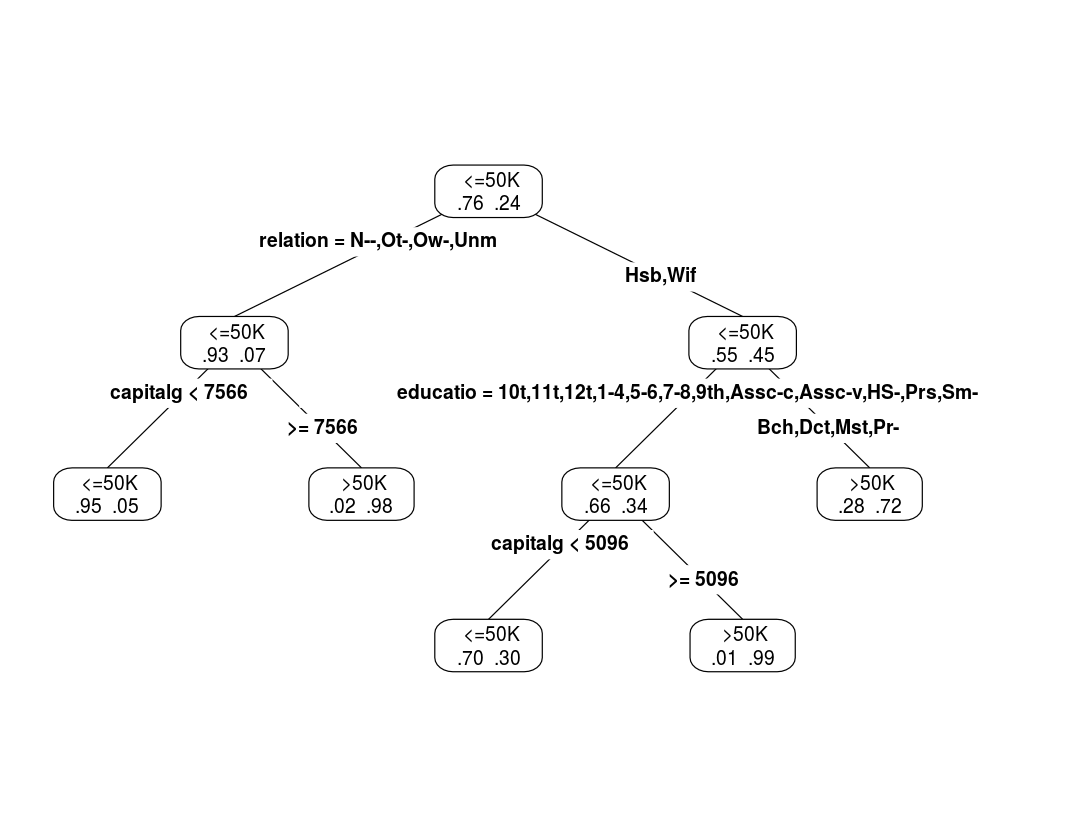

In [122]:
# build classification tree model
library(rpart)
library(rpart.plot)
cart1E <- rpart(over50k~., data=train1A, method="class")

# plot classification tree
options(repr.plot.width=9, repr.plot.height=7) # resize IRkernel plot size
prp(cart1E, extra=4, type=4, branch=0)

### 1F

There are a total of 4 different splits in the classification tree above.

### 1G

The first split of the tree is on the `relationship` variable.

### 1H

If, after the first split, the observation has a `relationnship` value of *Not-in-family*,*Other-relative*, *Own-child*, *Unmarried*, the tree will split on the `capitalgain` variable.

Else, the tree will will split on the `education` variable.

### 1I

In [39]:
# get postive/negative rates
predict1I <- predict(cart1E, test1A)
table(predict1I[,2]>0.5, test1A$over50k)

# calculate accuracy
(9243+1596)/(9243+1596+470+1482)

       
         <=50K  >50K
  FALSE   9243  1482
  TRUE     470  1596

[1] 0.8473927

### 1J

Observe that compared to the logistic regression ROC curve, the CART ROC curve is less smooth. The explanation is that the probabilities from the CART model take only a handful of values (five, one for each end bucket/leaf of the tree); the changes in the ROC curve correspond to setting the threshold to one of those values.

[[1]]
[1] 0.8470256

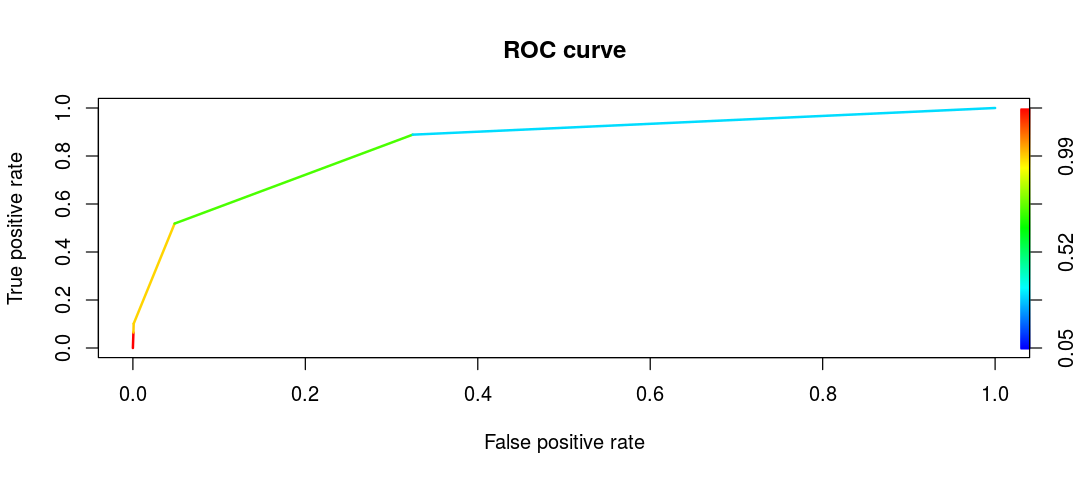

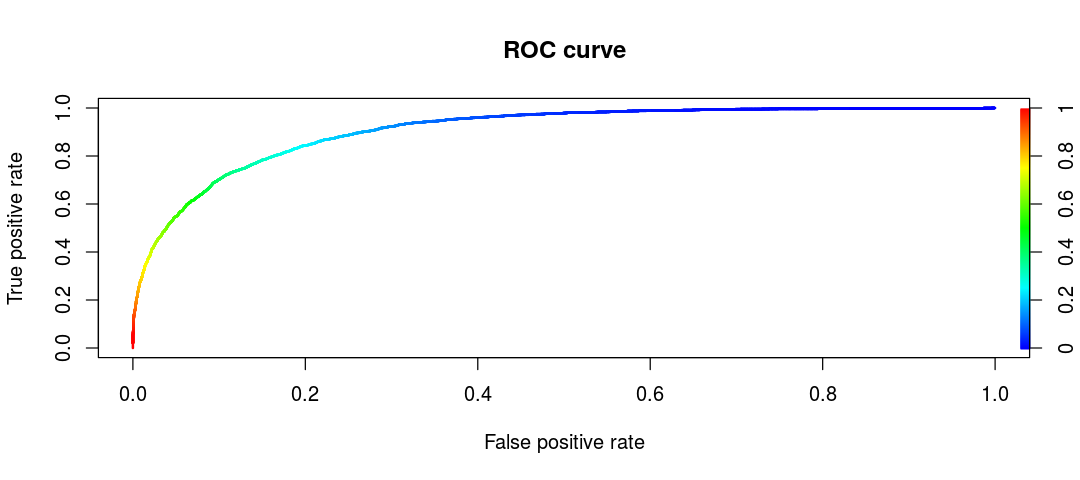

In [45]:
# calculate AUROC (CART model)
rocr1J <- prediction(predict1I[,2], test1A$over50k)
auc1J <- performance(rocr1J, measure="auc")
auc1J@y.values


options(repr.plot.width=9, repr.plot.height=4) # resize IRkernel plot size
# plot ROC curve (CART model)
curve1J <- performance(rocr1J, measure="tpr", x.measure="fpr")
plot(curve1J, main="ROC curve", lwd=2, colorize=T)

# plot ROC curve (log regression model)
curve1D <- performance(rocr1D, measure="tpr", x.measure="fpr")
plot(curve1D, main="ROC curve", lwd=2, colorize=T)

### 1K

$AUC_{CART} = 0.847$

### 1L

In [57]:
# downsampling size of training set to build random forest
# this is done to reduce computational effort and eliminate errors due to insufficient memory
set.seed(1)
train1Asmall <- train1A[sample(NROW(train1A), 2000),]

# build random forest
library(randomForest)
forest1L <- randomForest(over50k~., data=train1Asmall)

# predict results on test set
predict1L <- predict(forest1L, test1A, type="prob")
table(predict1L[,2]>0.5, test1A$over50k)

# calculate accuracy of CART
(9615+1048)/(9615+1048+98+2030)

       
         <=50K  >50K
  FALSE   9615  2030
  TRUE      98  1048

[1] 0.833633

### 1M

The **age** variable is the most significant factor in splitting the trees.

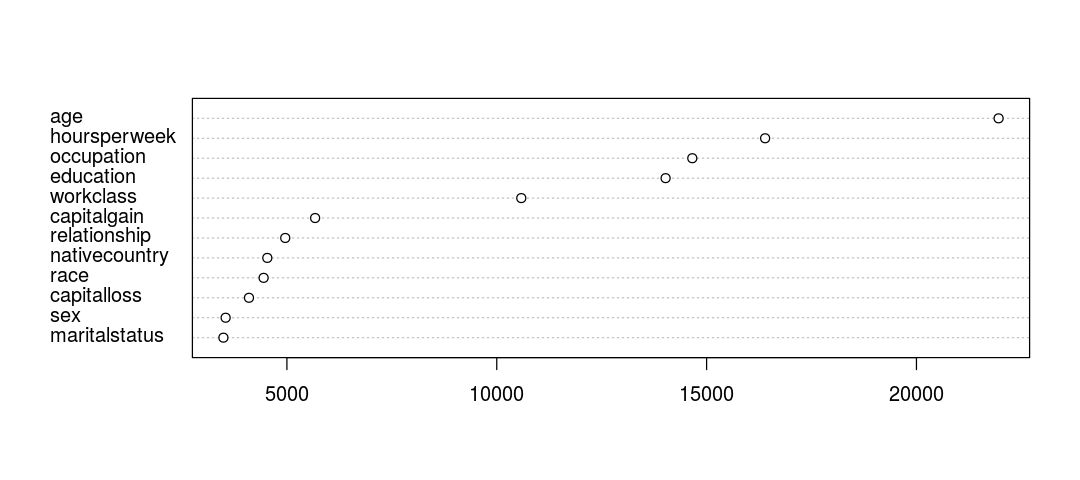

In [58]:
vu <- varUsed(forest1L, count=T)
vuSorted <- sort(vu, decreasing=F, index.return=T)
dotchart(vuSorted$x, names(forest1L$forest$xlevels[vuSorted$ix]))

### 1N

The **occupation** variable is the most significant in terms of mean reduction in impurity.

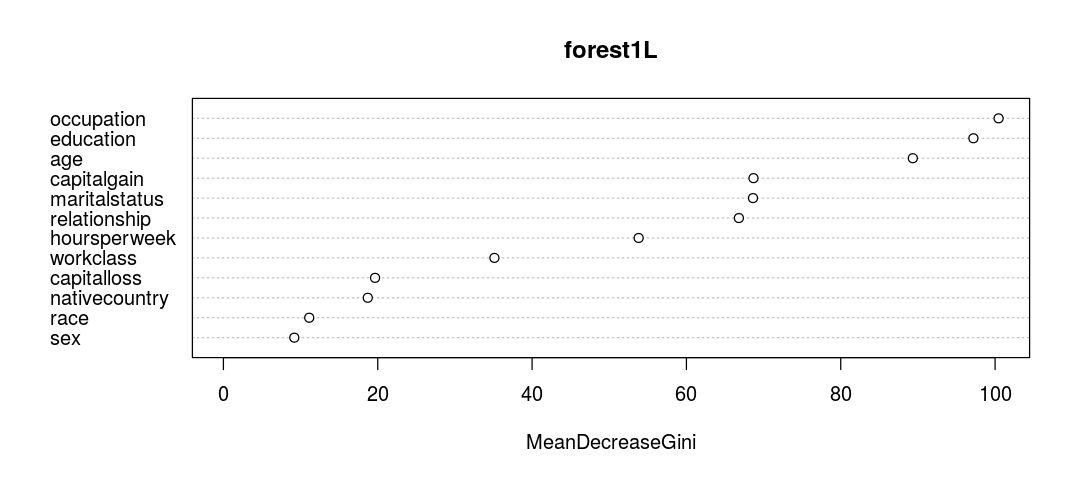

In [59]:
varImpPlot(forest1L)

### 1O

In [141]:
library(caret)

# initialise CART inner-model to use for cross-validation
control <- trainControl(method="cv", number=10, savePredictions="final")

# specify parameter grid to compute over (e.g. complexity parameter for CART)
grid <- expand.grid(cp=seq(0, 0.01, 0.0001)) 

# train the model (WARNING: LONG COMPUTATION TIME)
set.seed(1)
model1O <- train(over50k~., data=train1A, trControl=control, tuneGrid=grid, method="rpart")

,cp
9,8e-04


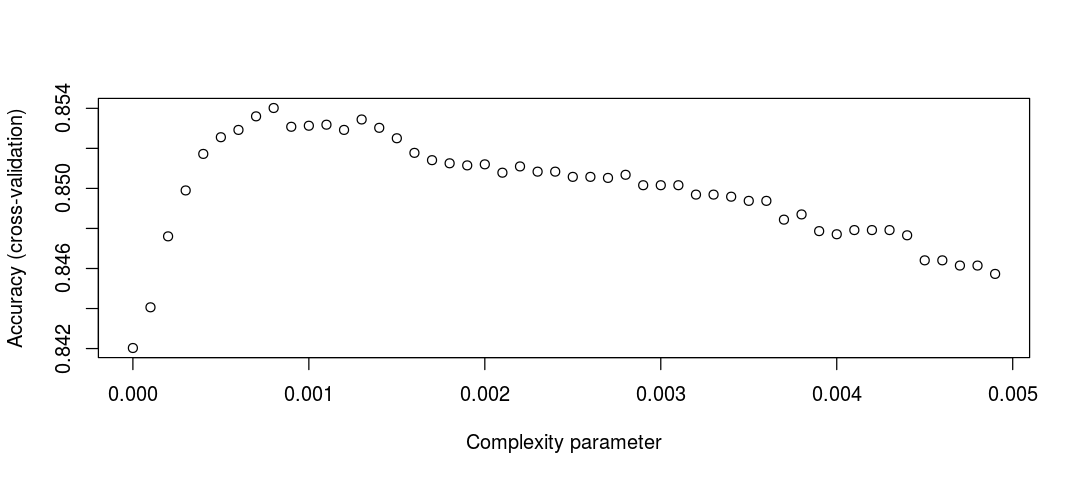

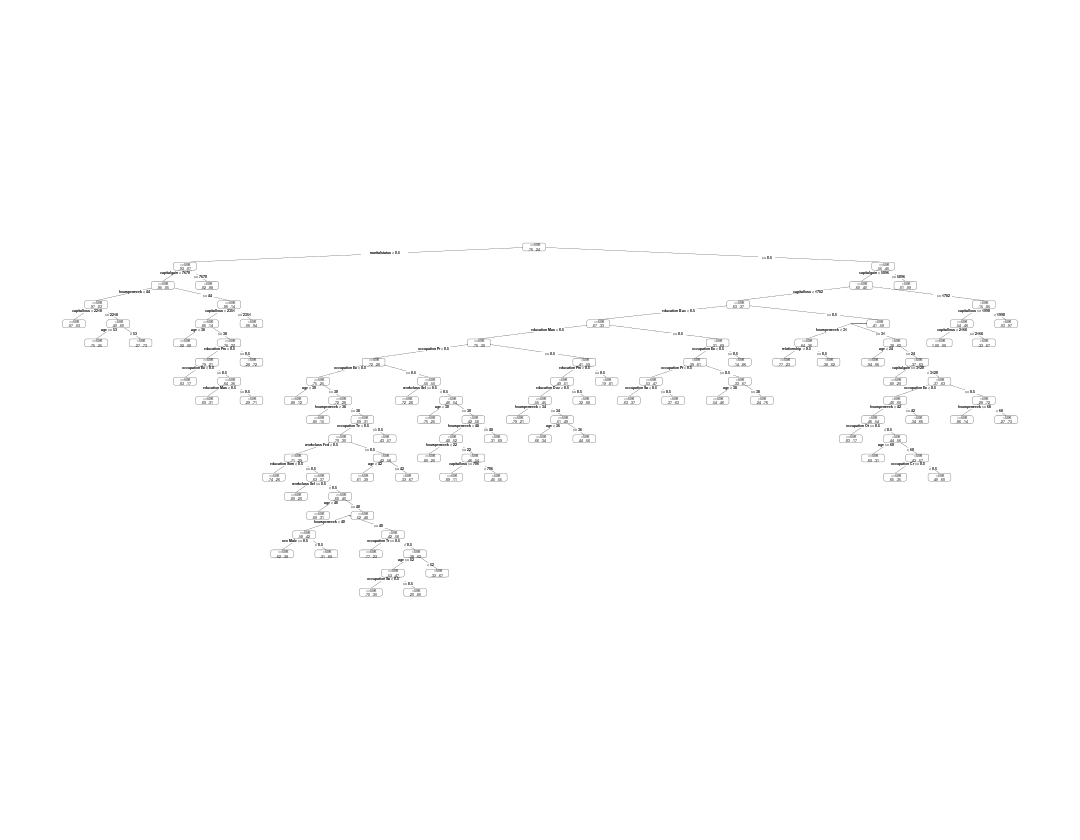

In [143]:
options(repr.plot.width=9, repr.plot.height=4) # resize IRkernel plot size
plot(model1O$results$cp[1:50], model1O$results$Accuracy[1:50],
     xlab="Complexity parameter",
     ylab="Accuracy (cross-validation)")

# results from highest accuracy tree
model1O$bestTune # index 9 has the highest accuracy
options(repr.plot.width=9, repr.plot.height=7) # resize IRkernel plot size
prp(model1O$finalModel, extra=4, type=4, branch=0)

### 1P

In [168]:
# get prediction accuracy on training set
NROW(subset(model1O$pred, model1O$pred[,2] == model1O$pred[,3])) / NROW(model1O$pred)

# get prediction accuracy on testing set
predict1P <- predict(model1O, test1A, type="raw")
table(predict1P, test1A$over50k)
(9081+1909)/(9081+1909+632+1169)

[1] 0.8540157

         
predict1P  <=50K  >50K
    <=50K   9081  1169
    >50K     632  1909

[1] 0.8591979

### 2A

Only **three** predictor variables were used in the regression tree.

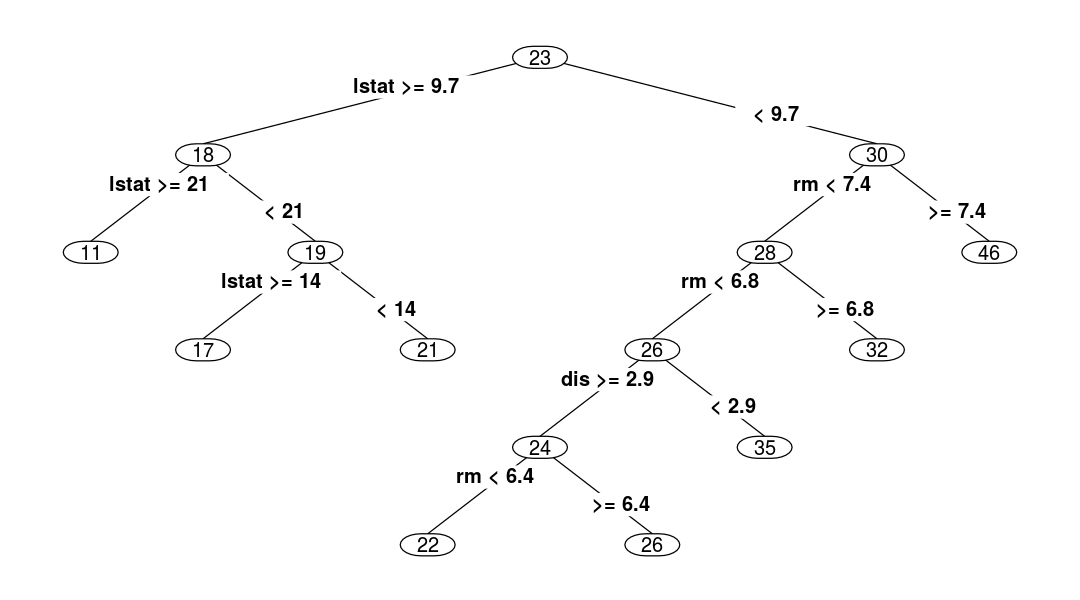

In [197]:
boston <- read.csv("csv/Boston.csv")

# splitting into training/test sets
set.seed(1)
spl <- sample(NROW(boston), 0.5*NROW(boston))
train2A <- boston[spl,]
test2A <- boston[-spl,]

# fitting regression tree
cart2A <- rpart(medv~., data=train2A, method="anova")
options(repr.plot.width=9, repr.plot.height=5) # resize IRkernel plot size
prp(cart2A, type=4, branch=0)

### 2B

[1] 25.35825

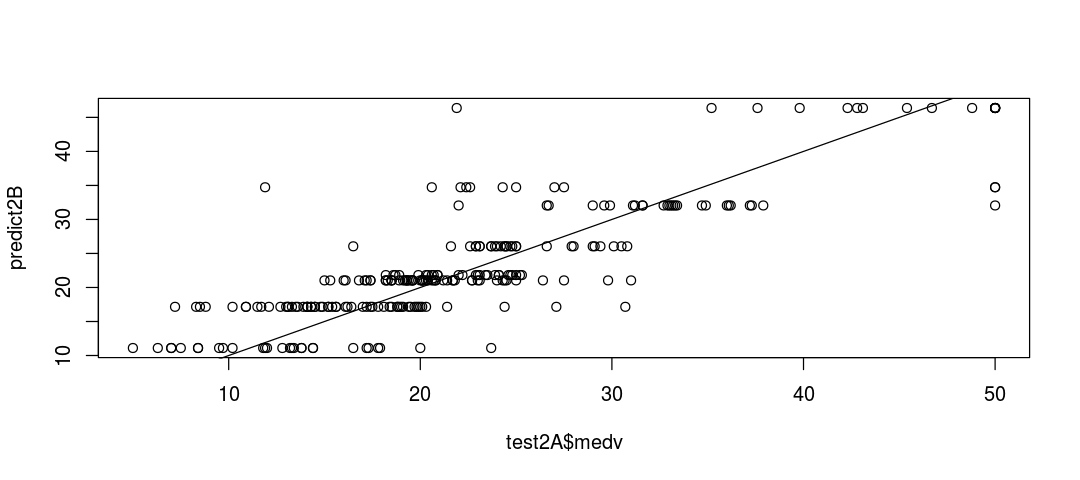

In [199]:
# calsulate mean square error of predicted values in test set
predict2B <- predict(cart2A, test2A)
mse2B <- mean((predict2B-test2A$medv)^2)
mse2B

# scatter plot of fitted vs true values
options(repr.plot.width=9, repr.plot.height=4) # resize IRkernel plot size
plot(test2A$medv, predict2B)
abline(0,1)

### 2C

In [200]:
# initialise CART inner-model to use for cross-validation
control <- trainControl(method="cv", number=10, savePredictions="final")

# specify parameter grid to compute over (e.g. complexity parameter for CART)
grid <- expand.grid(cp=seq(0, 0.01, 0.0001)) 

# train the model (WARNING: LONG COMPUTATION TIME)
set.seed(1)
model2C <- train(medv~., data=train2A, trControl=control, tuneGrid=grid, method="rpart")

,cp
16,0.0015


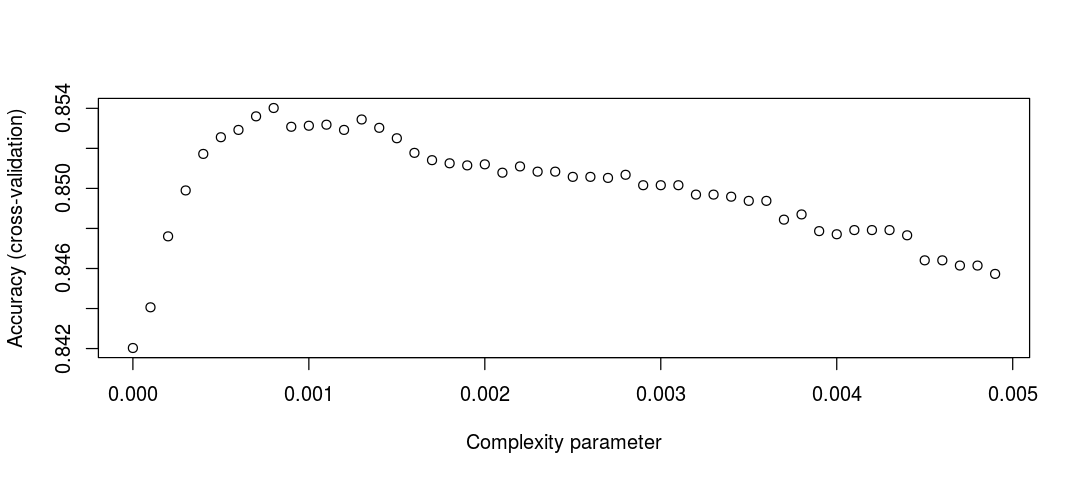

[1] 22.87735

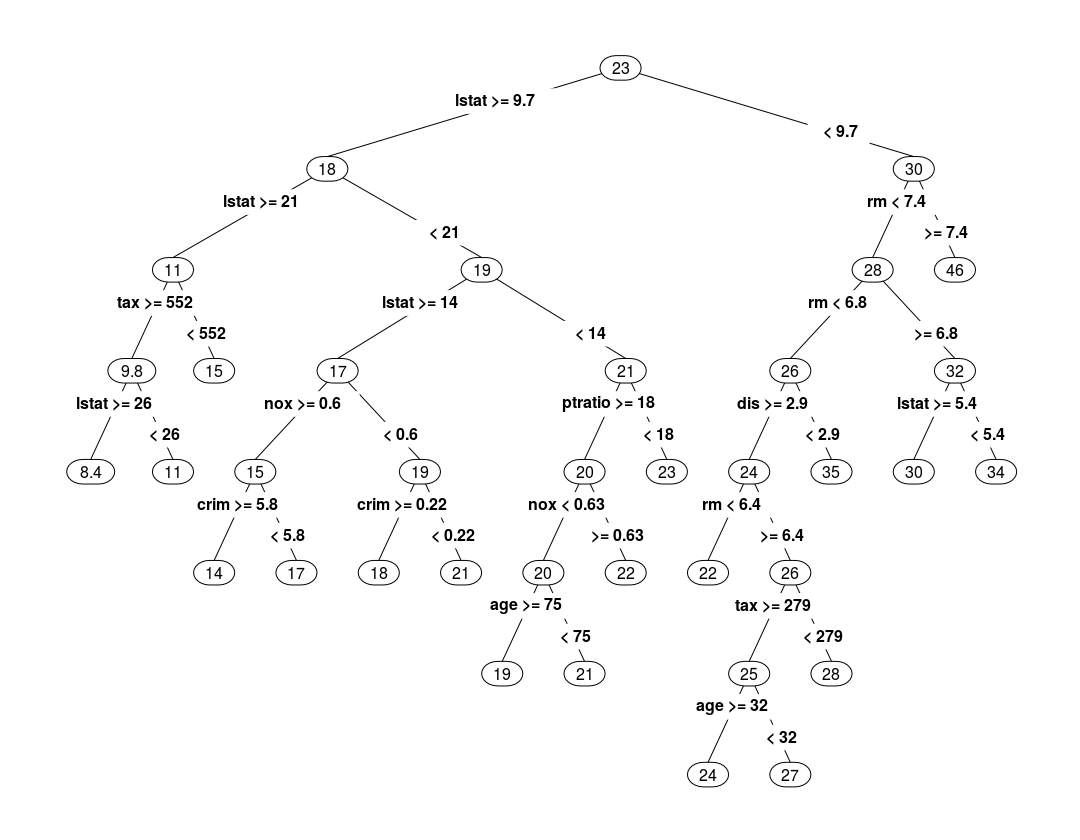

In [217]:
options(repr.plot.width=9, repr.plot.height=4) # resize IRkernel plot size
plot(model2C$results$cp[1:50], model1O$results$Accuracy[1:50],
     xlab="Complexity parameter",
     ylab="Accuracy (cross-validation)")

# results from highest accuracy tree
model2C$bestTune # index 16 has the highest accuracy
options(repr.plot.width=9, repr.plot.height=7) # resize IRkernel plot size
prp(model2C$finalModel, type=4, branch=0)

# calculate test MSE
predict2C <- predict(model2C, test2A)
mse2C <- mean((predict2C-test2A$medv)^2)
mse2C

### 2D

In [207]:
# initialise CART inner-model to use for cross-validation
control <- trainControl(method="cv",  savePredictions="final")

# specify parameter grid to compute over (e.g. complexity parameter for CART)
grid <- expand.grid(maxdepth=5) 

# train the model (WARNING: LONG COMPUTATION TIME)
set.seed(1)
model2D <- train(medv~., data=train2A, trControl=control, tuneGrid=grid, method="rpart2")

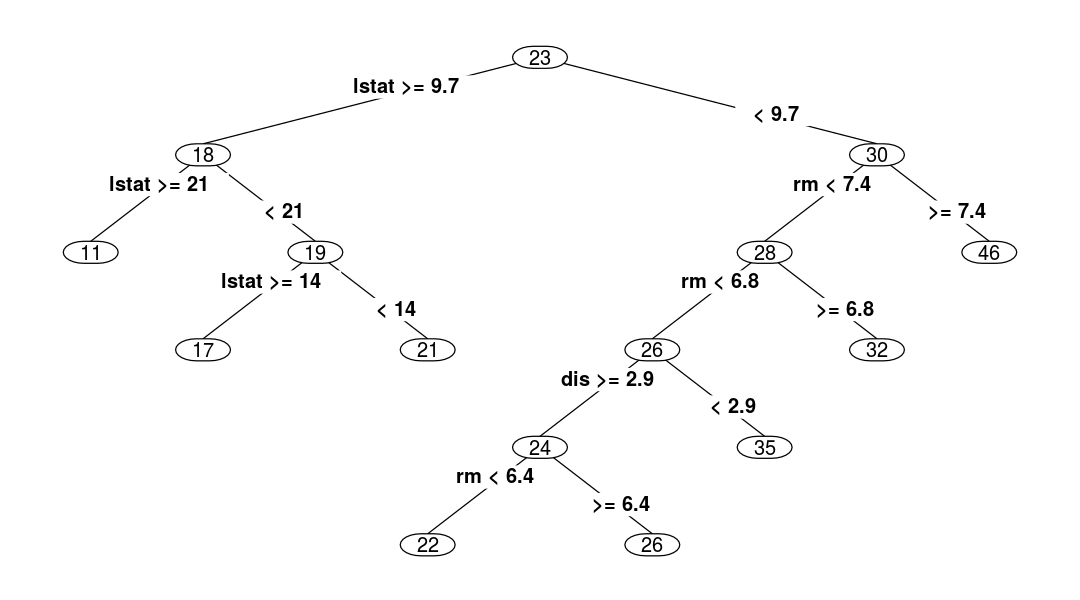

In [209]:
options(repr.plot.width=9, repr.plot.height=4) # resize IRkernel plot size
# plot(model2D$results$cp[1:50], model1O$results$Accuracy[1:50],
#      xlab="Complexity parameter",
#      ylab="Accuracy (cross-validation)")

# results from highest accuracy tree
# model2D$bestTune # index 16 has the highest accuracy
options(repr.plot.width=9, repr.plot.height=5) # resize IRkernel plot size
prp(model2D$finalModel, type=4, branch=0)

Test MSE is 25.36, which is identical to that of the result in part (b).

In [213]:
predict2D <- predict(model2D, test2A)
mse2D <- mean((predict2D-test2A$medv)^2)
mse2D

[1] 25.35825

### 2E

Test MSE is 11.93, which is considerably lower than that of the result of the CART model, which is 25.36. The `randomForest()` function tries 4 variables at each split (can be modified with `mtry` argument in `randomForest()`).

In [225]:
# build random forest
set.seed(1)
forest2E <- randomForest(medv~., data=train2A)
forest2E

# predict results on test set
predict2E <- predict(forest2E, test2A)

# calculate test mean square error
mse2E <- mean((predict2E-test2A$medv)^2)
mse2E


Call:
 randomForest(formula = medv ~ ., data = train2A) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 4

          Mean of squared residuals: 12.81989
                    % Var explained: 84.48

[1] 11.93146

### 2F

**lstat** and **rm** are the two most important variables in this random forest model.

,IncNodePurity
crim,1303.9189
zn,114.0047
indus,1309.5213
chas,108.5740
nox,1310.5029
rm,5481.3672
age,690.2379
dis,1463.2625
rad,183.6832
tax,714.5192


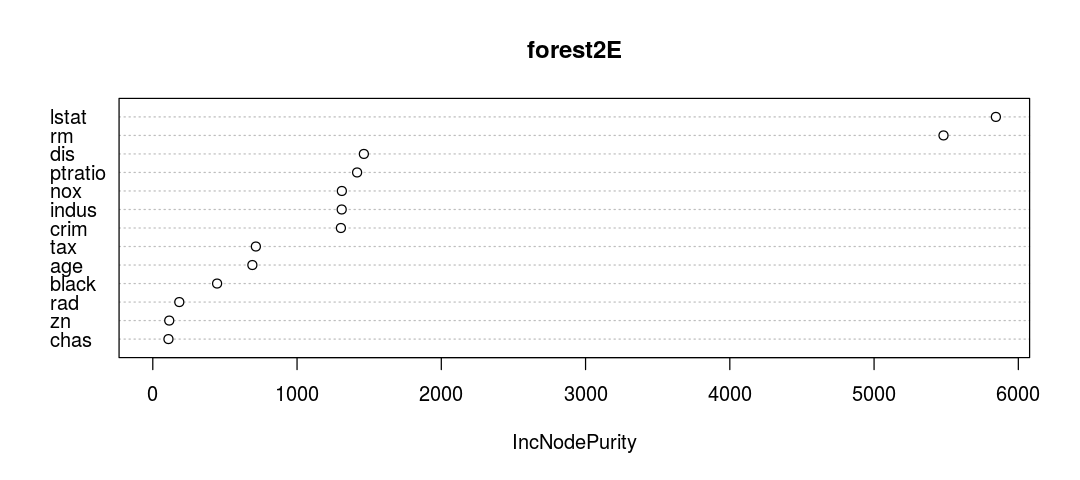

In [236]:
importance(forest2E)
options(repr.plot.width=9, repr.plot.height=4) # resize IRkernel plot size
varImpPlot(forest2E)

### 2G

For more info, read [this](https://datascienceplus.com/random-forests-in-r/).

The number of variables to split on has a convex relation to the MSE of the test set, as is shown below, with the lowest MSE of 11.44 being achieved when the random forest splits on 7 variables.

In [251]:
# initialising results vector
test_err <- as.matrix(double(length(train2A)-1))
rownames(test_err) <- c(1:(length(train2A)-1))

# calculate effect of number of variables to split on, on the test MSE
for (k in 1:(length(train2A)-1)) {
    
    # build random forest
    set.seed(1)
    forest2G <- randomForest(medv~., data=train2A, mtry=k)
    # forest2G

    # predict results on test set
    predict2G <- predict(forest2G, test2A)

    # calculate test mean square error
    mse2G <- mean((predict2G-test2A$medv)^2)
    test_err[k] <- mse2G
    
}

test_err

1,21.44084
2,13.63140
3,11.84435
4,11.93146
5,11.55823
6,11.50837
7,11.43716
8,11.59553
9,12.36259
10,12.51141
11,13.01938


### 3A

In [269]:
supreme <- read.csv("csv/supremeexercise.csv")
str(supreme)

# fraction of cases where upper court reversed lower court's decision
supreme$lctdir2 <- ifelse(supreme$lctdir == "conser", 1, 0)
NROW(subset(supreme, supreme$result == supreme$lctdir2))/NROW(supreme)

'data.frame':	598 obs. of  20 variables:
 $ docket : Factor w/ 598 levels "00-1011","00-1021",..: 93 94 95 96 97 98 99 100 101 102 ...
 $ term   : int  1994 1994 1994 1994 1994 1994 1994 1994 1994 1994 ...
 $ party_1: Factor w/ 209 levels "0","AC","AG",..: 75 78 200 194 89 10 84 194 88 194 ...
 $ party_2: Factor w/ 202 levels "AC","AIRLINE",..: 54 133 195 188 83 91 81 177 183 1 ...
 $ rehndir: int  1 0 0 1 1 1 1 1 1 1 ...
 $ stevdir: int  0 0 0 0 0 1 1 0 1 0 ...
 $ ocondir: int  1 0 0 0 1 0 0 1 1 1 ...
 $ scaldir: int  1 1 0 1 1 1 0 1 1 1 ...
 $ kendir : int  1 0 0 0 0 1 1 1 1 1 ...
 $ soutdir: int  1 0 0 0 0 0 0 0 1 0 ...
 $ thomdir: int  1 1 0 1 1 1 0 1 1 1 ...
 $ gindir : int  1 0 0 0 0 1 1 0 1 1 ...
 $ brydir : int  1 0 0 0 0 0 1 0 1 1 ...
 $ petit  : Factor w/ 12 levels "BUSINESS","CITY",..: 1 9 9 12 4 9 9 12 9 12 ...
 $ respon : Factor w/ 12 levels "BUSINESS","CITY",..: 1 9 9 9 9 9 1 9 1 3 ...
 $ circuit: Factor w/ 13 levels "10th","11th",..: 13 2 13 12 5 8 8 7 11 11 ...
 $ uncon

[1] 0.3846154